In [275]:
import qutip as qt
import numpy as np

# Tracking info of simulations 
import tqdm
import time
import warnings

#Saving data
import pandas as pd
import json
import os

import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.gridspec import GridSpec

In [276]:
import sys
sys.path.append('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/src')

import model_building as md
import Hamiltonian as Ham
import dynamics as dyn
import data_handling as dh
import plots as plots

In [ ]:
# Define parameters
N=15
lmd = 0.02272
J = 0.5

state_dictionary = {"1100":1, "1010":1, "1001":1, "0101":1, "0011":1}

ti = 0
tf = 150
Nsteps = 500

In [278]:
initial_state_ST, target_state_ST = md.create_ST_initial_and_target(state_dictionary, N)

In [279]:
# Standard version
H_s = Ham.Hamiltonian(system_size = N,
                    mode = "standard",
                    lambda_factor = lmd
                    )


In [280]:
# Calibrate chain under ideal circumstances
transport_steps, transport_time = dyn.chain_calibration(initial_state_ST, H_s, ti, tf, Nsteps)

In [281]:
# test that algorithm works well without errors
fidelity, magnetizations = dyn.OneStepAlgorithm(initial_state_ST, target_state_ST, H_s, ti, transport_time, transport_steps, factor = 1.12)

print(max(fidelity))

0.9999920493091963


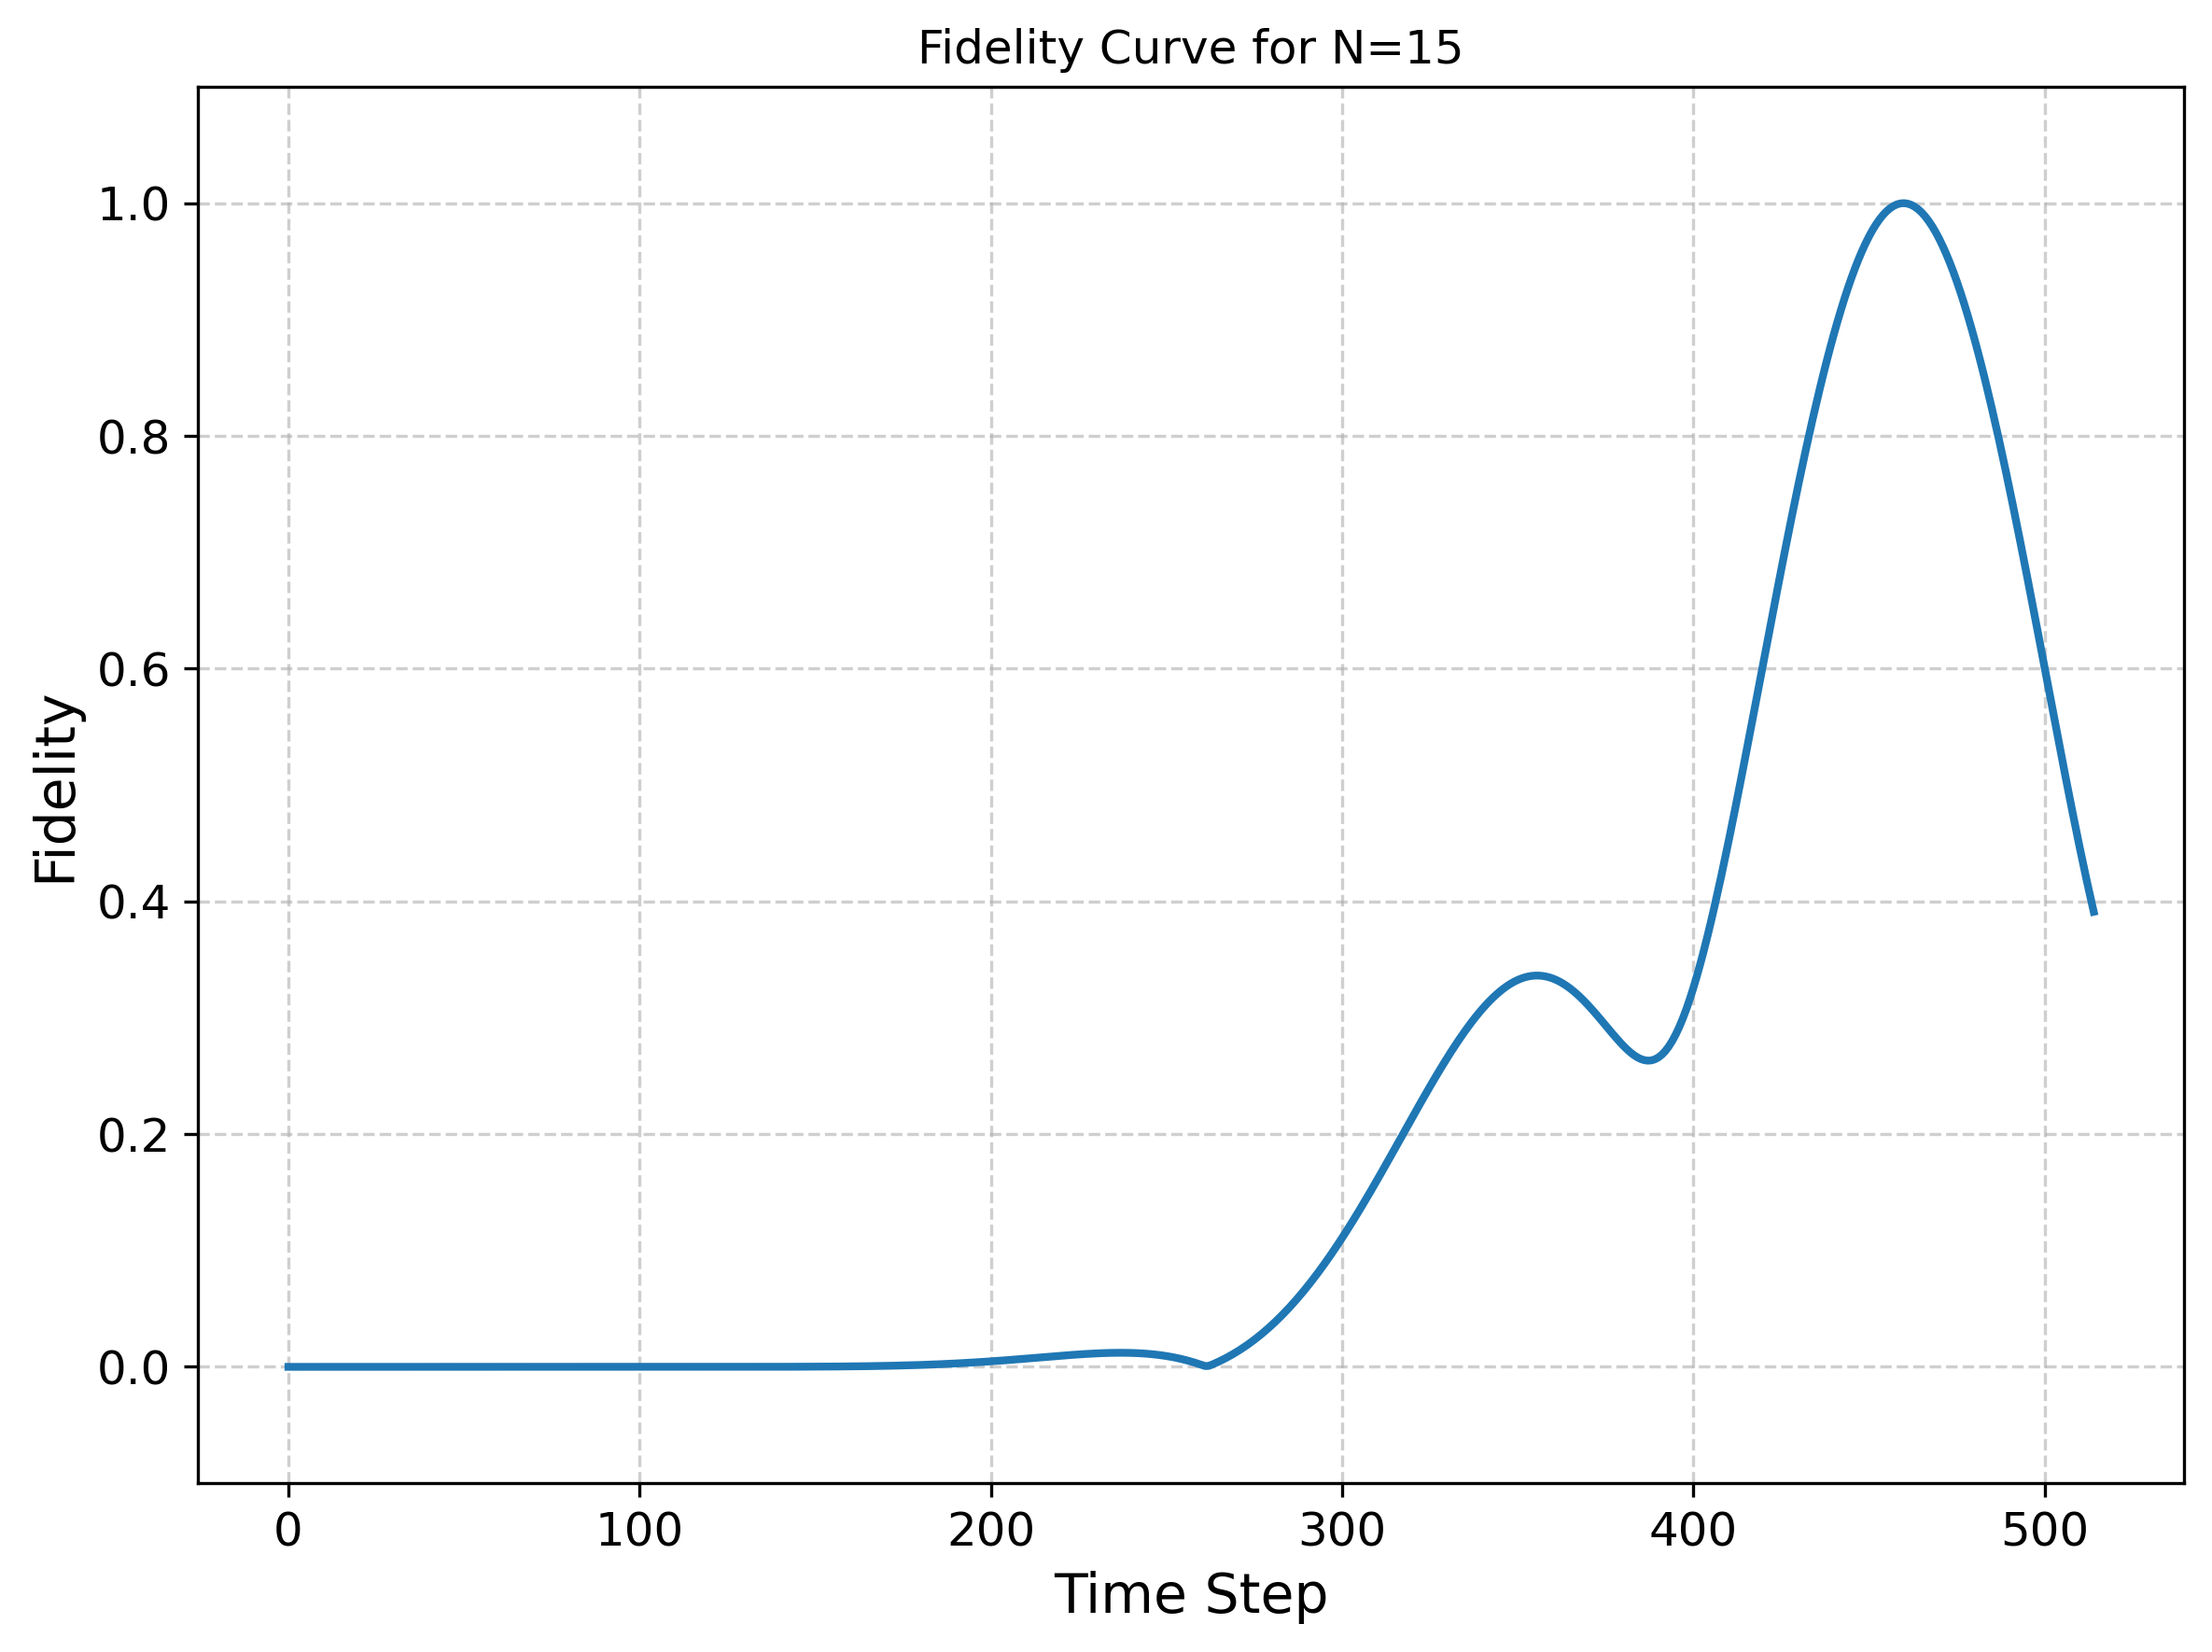

In [282]:
plots.plot_fidelity(fidelity, N)

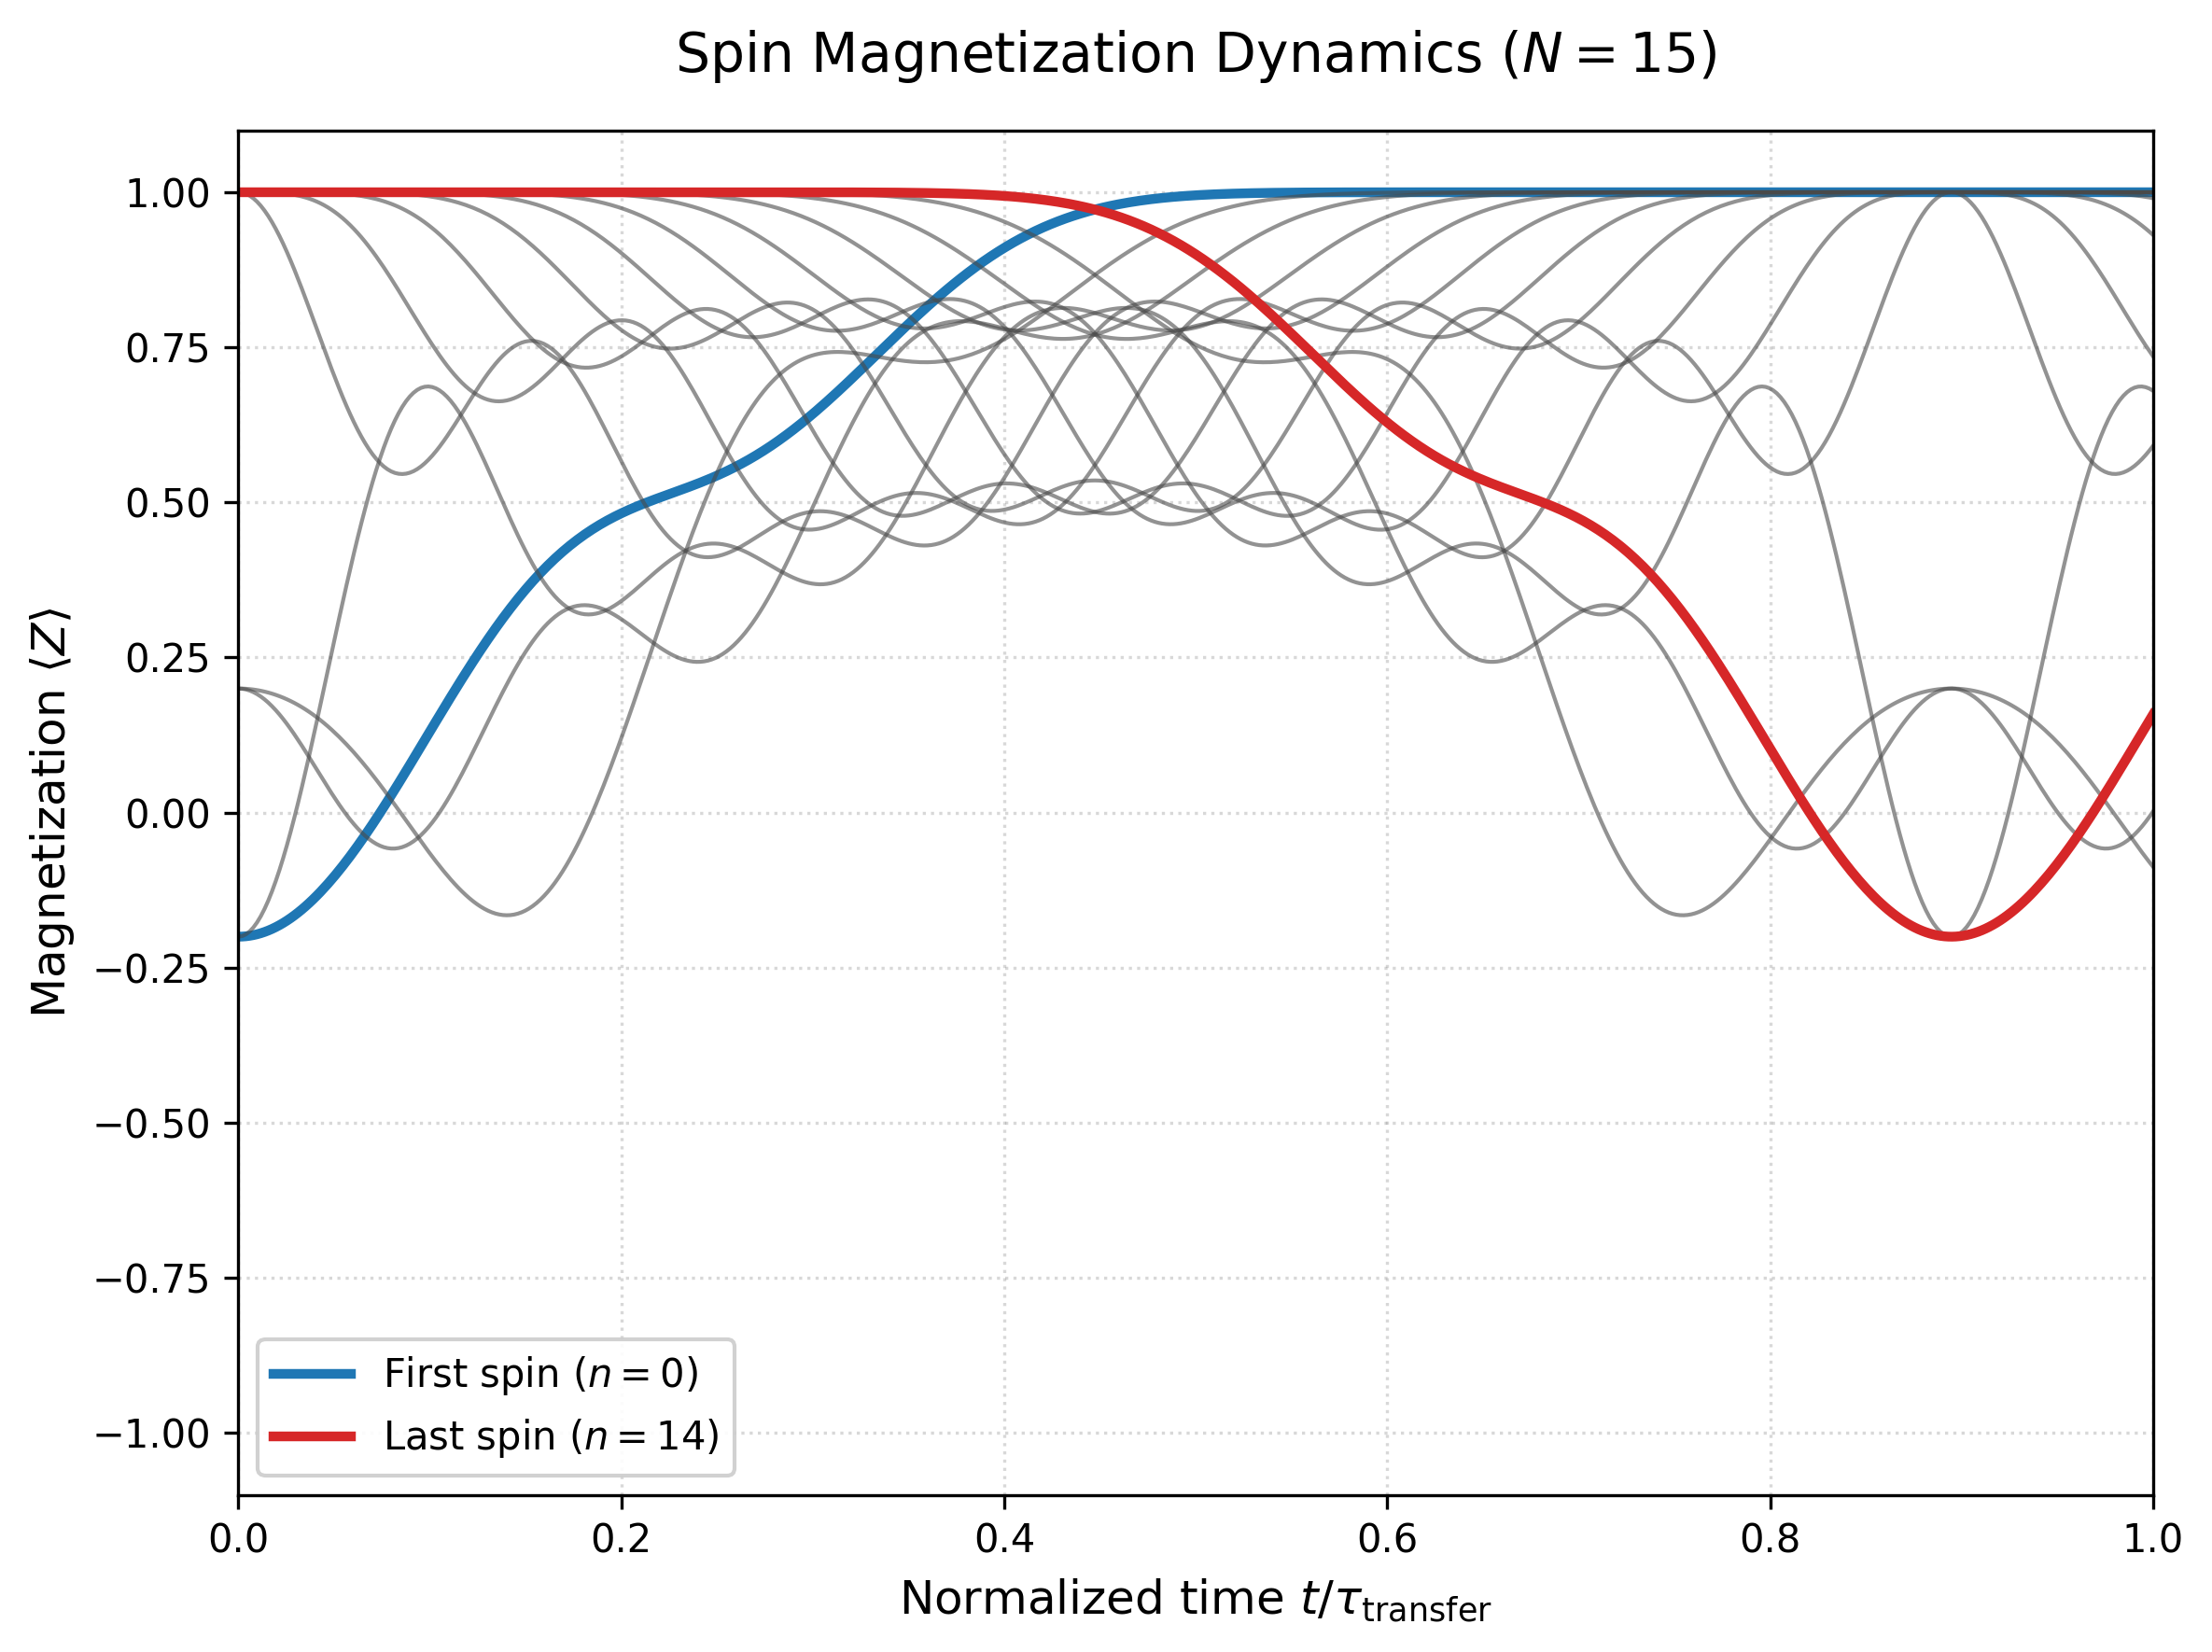

In [283]:
plots.plot_z_expectations(magnetizations, N)

In [284]:
import pandas as pd

def create_observables_dataframe(state1, state2, H, state1_name="Final", state2_name="Target"):
    """Create a pandas DataFrame for nice tabular output."""
    
    data = []
    obs_dict = {'σx': H.sx_list, 'σy': H.sy_list, 'σz': H.sz_list}
    
    for obs_name, op_list in obs_dict.items():
        for i, op in enumerate(op_list):
            v1 = qt.expect(op, state1)
            v2 = qt.expect(op, state2)
            data.append({
                'Observable': obs_name,
                'Qubit': i,
                state1_name: v1,
                state2_name: v2,
                'Difference': abs(v1 - v2)
            })
    
    df = pd.DataFrame(data)
    return df

# Usage with beautiful printing
df = create_observables_dataframe(result.states[-1], target_state, H)
print(df.to_string(float_format="%.4f", index=False))

NameError: name 'result' is not defined

In [ ]:
magn_end = np.array([qt.expect(op, result.states[-1]) 
                    for op in H.sx_list])
print(magn_end)

magn_target = np.array([qt.expect(op, target_state) 
                    for op in H.sx_list])
print(magn_target)


[-1.01070737e-07  0.00000000e+00 -2.45052203e-06  0.00000000e+00
 -1.16284423e-05  0.00000000e+00 -2.38161438e-05  0.00000000e+00
  2.48716101e-02  0.00000000e+00]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [292]:
a = 5
b = 3

In [293]:
assert a*b == 6 , "The operation is incorrect"

AssertionError: The operation is incorrect